In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

가우시안 혼합 모델(Gaussian Mixture Model)  
가우시안 혼합 모델은 전체 집단 내부에 속한 하위 집단의 존재를 가정한 확률 모델이다.  
가우시안 혼합 모델은 전체 집단의 확률 분포가 가우시안 분포를 따르는 경우를 말하며 흔히 정규 분포를 가우시안 분포라 부른다. 또한 가우시안 혼합 모형은 비지도 학습의 한 종류로 클러스터링에 사용된다.

가우시안 혼합 모델 알고리즘을 활용해 주어진 데이터를 클러스터링해 본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=4, random_state=2) # 클러스터링용 가상 데이터를 만든다.
print(X.shape, y.shape)

(200, 2) (200,)


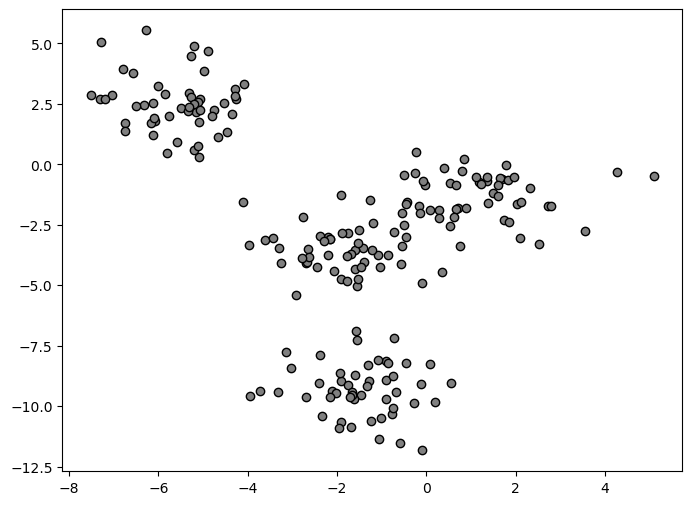

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# 가우시안 혼합 모델 생성 후 데이터 학습
from sklearn.mixture import GaussianMixture # 가우시안 혼합 모델을 사용하기 위해 import 시킨다.
# n_components 속성으로 클러스터의 개수를 지정한다. 기본값은 1이다.
gmm = GaussianMixture(n_components=4, random_state=0) # 가우시안 혼합 모델을 만든다.
# gmm.fit(X) # 피쳐 데이터 X를 모델에 넣어서 가우시안 혼합 모델 알고리즘을 학습시킨다.
# label_gmm = gmm.predict(X) # 학습 결과를 예측한다.
label_gmm = gmm.fit_predict(X)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
print(label_gmm)

[0 3 2 1 2 0 0 1 2 2 3 2 3 0 0 1 2 0 3 1 2 0 2 2 2 1 1 1 2 0 3 0 1 0 1 3 3
 1 0 3 3 1 1 1 0 3 3 0 1 1 3 1 3 1 2 1 3 2 0 1 0 0 2 1 2 1 3 3 0 2 0 2 2 2
 1 0 0 3 2 2 1 3 0 0 2 2 1 3 1 1 1 3 1 3 2 0 2 2 0 1 2 3 3 3 0 1 1 0 0 3 2
 1 2 3 2 1 3 0 3 3 1 3 3 0 1 1 2 2 0 1 2 2 0 0 2 2 3 1 3 0 3 2 2 0 0 3 0 1
 3 2 3 3 0 0 2 0 0 3 3 1 2 2 0 0 3 2 1 1 0 2 3 1 0 2 2 0 1 3 3 3 2 2 0 0 2
 0 2 2 3 0 2 2 3 1 3 3 1 0 3 1]


클러스터링된 데이터 시각화

In [6]:
import pandas as pd
gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm # 데이터프레임에 클러스터링된 라벨을 결합한다.
X_gmm_df

,gmm_comp1,gmm_comp2,target,label_gmm
0,-6.115731,2.523037,3,0
1,-0.455399,-8.233262,0,3
2,0.717070,-1.810436,1,2
3,-3.967047,-3.334784,2,1
4,4.272995,-0.322691,1,2
...,...,...,...,...
195,-0.584982,-11.514942,0,3
196,-2.910211,-5.418897,2,1
197,-6.741543,1.388460,3,0
198,-0.846606,-8.203096,0,3


In [7]:
# 타겟 클래스와 클러스터링 라벨의 종류 확인
print(set(X_gmm_df.target), set(X_gmm_df.label_gmm))

{0, 1, 2, 3} {0, 1, 2, 3}


실제 타겟 데이터 시각화

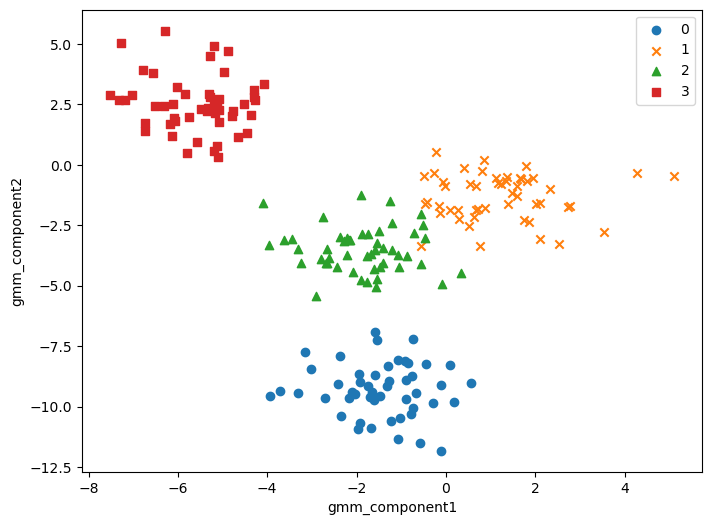

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's']

for index, marker in enumerate(markers):
    df_index = X_gmm_df[X_gmm_df.target == index]
    target_index = index
    X1 = df_index.gmm_comp1
    X2 = df_index.gmm_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

가우시안 혼합 모델 적용 데이터 시각화

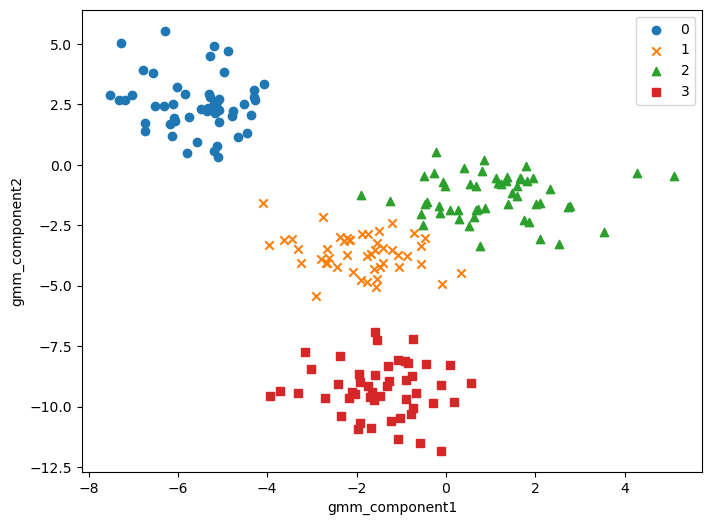

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's']

for index, marker in enumerate(markers):
    df_index = X_gmm_df[X_gmm_df.label_gmm == index]
    target_index = index
    X1 = df_index.gmm_comp1
    X2 = df_index.gmm_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

In [15]:
# 실루엣 스코어
from sklearn.metrics import silhouette_score # 실루엣 스코어 알고리즘을 사용하기 위해 import 한다.
# silhouette_score() 메소드에 피처 데이터(X)와 군집화 결과로 얻은 레이블(label_gmm)을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.621815234658363
